# Capstone Project 1_ Exploratory Data

For phenotypic data:
 Is there a significant difference between my own data and data obtained from database?

For genotypic data:
 Is there any correalation between the SNP and Trait?

# # Python code used to answer the questions I asked

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
## combine cleaned data together: Option1 using pd.merge
cleaned_y = pd.read_csv('Yield.csv')
cleaned_p = pd.read_csv('protein.csv')
cleaned_o= pd.read_csv('oil.csv')
combined_yp = pd.merge(cleaned_y,cleaned_p,on='id',how='outer')
combined_ypo=pd.merge(combined_yp,cleaned_o,on='id',how='outer')
print(combined_ypo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 0 to 9820
Data columns (total 7 columns):
Unnamed: 0_x    9815 non-null float64
id              9821 non-null object
yield           7093 non-null float64
Unnamed: 0_y    9709 non-null float64
protein         9642 non-null float64
Unnamed: 0      9680 non-null float64
oil             9613 non-null float64
dtypes: float64(6), object(1)
memory usage: 613.8+ KB
None


In [3]:
combined_ypo.head()

,Unnamed: 0_x,id,yield,Unnamed: 0_y,protein,Unnamed: 0,oil
0,0.0,PI103414,2.28,0.0,37.7,0.0,21.6
1,1.0,PI132215,1.84,1.0,39.7,1.0,20.4
2,5.0,PI153214,1.82,5.0,41.1,5.0,18.2
3,6.0,PI153229,1.74,6.0,38.3,6.0,19.5
4,7.0,PI153236,2.07,7.0,39.0,7.0,20.4


In [4]:
combined_ypo.to_csv('combined_ypo.csv')

In [5]:
## combine cleaned data together: Option 2 using reduce
dfs = [cleaned_y,cleaned_p,cleaned_o]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id',how='outer'), dfs)

In [6]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 0 to 9820
Data columns (total 7 columns):
Unnamed: 0_x    9815 non-null float64
id              9821 non-null object
yield           7093 non-null float64
Unnamed: 0_y    9709 non-null float64
protein         9642 non-null float64
Unnamed: 0      9680 non-null float64
oil             9613 non-null float64
dtypes: float64(6), object(1)
memory usage: 613.8+ KB
None


#### two methods got same results

In [7]:
df_final.head()

,Unnamed: 0_x,id,yield,Unnamed: 0_y,protein,Unnamed: 0,oil
0,0.0,PI103414,2.28,0.0,37.7,0.0,21.6
1,1.0,PI132215,1.84,1.0,39.7,1.0,20.4
2,5.0,PI153214,1.82,5.0,41.1,5.0,18.2
3,6.0,PI153229,1.74,6.0,38.3,6.0,19.5
4,7.0,PI153236,2.07,7.0,39.0,7.0,20.4


In [8]:
## add a new column named as origin
origin=[]
for idx in df_final['id']:
    if idx.startswith('PI'):
        origin.append('germplasm')
    else: 
       origin.append('own_lines')


In [9]:
print(origin[:10])

['germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm', 'germplasm']


In [10]:
df_final['origin']=origin

### Is there a significant difference between my own data and data obtained from database in agronomic traits?

In [11]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data =np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data =np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 =permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff



In [12]:
df_group=df_final[['id','yield','protein','oil','origin']]

In [13]:
df_group.rename(columns = {'yield':'YLD'}, inplace = True) 

/home/wang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
df_group.head()

,id,YLD,protein,oil,origin
0,PI103414,2.28,37.7,21.6,germplasm
1,PI132215,1.84,39.7,20.4,germplasm
2,PI153214,1.82,41.1,18.2,germplasm
3,PI153229,1.74,38.3,19.5,germplasm
4,PI153236,2.07,39.0,20.4,germplasm


In [15]:
df_group.dropna().to_csv('p_with_group.txt',sep='\t')

In [16]:
g_data=df_group.loc[df_group['origin']=='germplasm']

In [17]:
own_data=df_group.loc[df_group['origin']=='own_lines']

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [19]:
g_data[:5]

,id,YLD,protein,oil,origin
0,PI103414,2.28,37.7,21.6,germplasm
1,PI132215,1.84,39.7,20.4,germplasm
2,PI153214,1.82,41.1,18.2,germplasm
3,PI153229,1.74,38.3,19.5,germplasm
4,PI153236,2.07,39.0,20.4,germplasm


Text(0.5, 1.0, 'Yield')

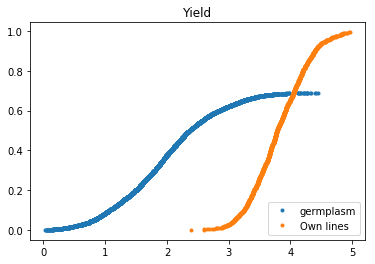

In [21]:
x_gy,y_gy = ecdf(g_data['YLD'])
x_oy, y_oy = ecdf(own_data['YLD'])


# Plot all ECDFs on the same plot
_=plt.plot(x_gy,y_gy,marker='.',linestyle='none')
_=plt.plot(x_oy,y_oy,marker='.',linestyle='none')

# Annotate the plot
plt.legend(('germplasm', 'Own lines', ), loc='lower right')
plt.title('Yield')

In [22]:
## For yield 

In [24]:
# Compute difference of mean impact force from experiment for yield: empirical_diff_means
empirical_diff_means = diff_of_means(g_data['YLD'],own_data['YLD'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(g_data['YLD'],own_data['YLD'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates>= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

print(len(perm_replicates))

p-value = 0.0
10000


/home/wang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [25]:
## for protein 

Text(0.5, 1.0, 'Protein')

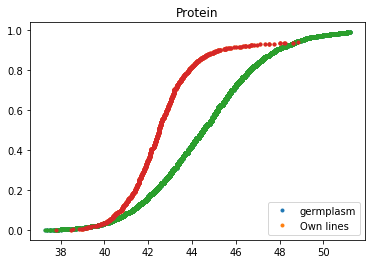

In [26]:
x_gy,y_gy = ecdf(g_data['protein'])
x_oy, y_oy = ecdf(own_data['protein'])


# Plot all ECDFs on the same plot
_=plt.plot(x_gy,y_gy,marker='.',linestyle='none')
_=plt.plot(x_oy,y_oy,marker='.',linestyle='none')

# Annotate the plot
plt.legend(('germplasm', 'Own lines', ), loc='lower right')
plt.title('Protein')

# Plot all ECDFs on the same plot
_=plt.plot(x_gy,y_gy,marker='.',linestyle='none')
_=plt.plot(x_oy,y_oy,marker='.',linestyle='none')

# Annotate the plot
plt.legend(('germplasm', 'Own lines', ), loc='lower right')
plt.title('Protein')

In [27]:
# Compute difference of mean impact force from experiment for protein: empirical_diff_means
empirical_diff_means = diff_of_means(g_data['protein'],own_data['protein'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(g_data['protein'],own_data['protein'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates>= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

print(len(perm_replicates))

p-value = 0.0
10000


/home/wang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [28]:
## for oil

Text(0.5, 1.0, 'Protein')

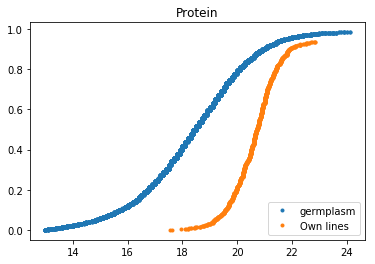

In [29]:
x_gy,y_gy = ecdf(g_data['oil'])
x_oy, y_oy = ecdf(own_data['oil'])


# Plot all ECDFs on the same plot
_=plt.plot(x_gy,y_gy,marker='.',linestyle='none')
_=plt.plot(x_oy,y_oy,marker='.',linestyle='none')

# Annotate the plot
plt.legend(('germplasm', 'Own lines', ), loc='lower right')
plt.title('Protein')

In [30]:
# Compute difference of mean impact force from experiment for oil: empirical_diff_means
empirical_diff_means = diff_of_means(g_data['oil'],own_data['oil'])

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(g_data['oil'],own_data['oil'],
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates>= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

print(len(perm_replicates))

p-value = 0.0
10000


/home/wang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [32]:
# conduct two-sample t-test for yield
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(g_data['YLD'], own_data['YLD'],nan_policy='omit')

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -76.41072605495663
p value = 0.0


In [33]:
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected")
else:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - cannot be rejected")

The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected


In [34]:
# conduct two-sample t-test for protein
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(g_data['protein'], own_data['protein'],nan_policy='omit')

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: 24.973510948052283
p value = 1.9430312020196627e-133


In [35]:
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected")
else:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - cannot be rejected")

The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected


In [36]:
# conduct two-sample t-test for oil
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(g_data['oil'], own_data['oil'],nan_policy='omit')

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -35.58444381308081
p value = 1.1981411415830783e-260


In [37]:
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected")
else:
    print("The null hypothesis that there is no difference between my own data and data obtained from database  - cannot be rejected")

The null hypothesis that there is no difference between my own data and data obtained from database  - can be rejected


## Check the relationship between SNPs and Phenotypic data

#####  import Hail, a python package for genome wide association study (GWAS )

In [2]:
import hail as hl
hl.init()

Running on Apache Spark version 2.4.1
SparkUI available at http://35.10.236.13:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.25-04344d214361
LOGGING: writing to /home/wang/hail-20191031-1714-0.2.25-04344d214361.log


In [3]:
from hail.plot import show
from pprint import pprint
hl.plot.output_notebook()

Loading BokehJS ...

In [4]:
hl.import_vcf('vcf_last_full.vcf',reference_genome=None).write('2kg.mt', overwrite=True)

2019-10-31 17:14:40 Hail: INFO: Ordering unsorted dataset with network shuffle
2019-10-31 17:15:29 Hail: INFO: wrote matrix table with 35218 rows and 9765 columns in 41 partitions to 2kg.mt


In [5]:
mt = hl.read_matrix_table('2kg.mt')

In [6]:
mt.row_key.show(5)


locus.contig,locus.position,alleles
str,int32,array<str>
"""1""",24939,"[""A"",""G""]"
"""1""",25990,"[""C"",""T""]"
"""1""",29658,"[""A"",""G""]"
"""1""",30699,"[""G"",""A""]"
"""1""",37005,"[""C"",""T""]"


In [7]:
mt.s.show(5)

s
str
"""PI253651A"""
"""PI347550A"""
"""PI408055A"""
"""PI408069"""
"""PI408169A"""


In [8]:
mt.entry.take(5)

[Struct(GT=Call(alleles=[0, 0], phased=False), AD=None, DP=None, GQ=None, PL=None),
 Struct(GT=Call(alleles=[0, 0], phased=False), AD=None, DP=None, GQ=None, PL=None),
 Struct(GT=Call(alleles=[0, 0], phased=False), AD=None, DP=None, GQ=None, PL=None),
 Struct(GT=Call(alleles=[0, 0], phased=False), AD=None, DP=None, GQ=None, PL=None),
 Struct(GT=Call(alleles=[1, 1], phased=False), AD=None, DP=None, GQ=None, PL=None)]

In [9]:
table = (hl.import_table('p_with_group.txt', impute=True)
         .key_by('id'))

2019-10-31 17:15:31 Hail: INFO: Reading table to impute column types
2019-10-31 17:15:31 Hail: INFO: Finished type imputation
  Loading column '' as type 'int32' (imputed)
  Loading column 'id' as type 'str' (imputed)
  Loading column 'YLD' as type 'float64' (imputed)
  Loading column 'protein' as type 'float64' (imputed)
  Loading column 'oil' as type 'float64' (imputed)
  Loading column 'origin' as type 'str' (imputed)


In [10]:
table.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Row fields:
    '': int32 
    'id': str 
    'YLD': float64 
    'protein': float64 
    'oil': float64 
    'origin': str 
----------------------------------------
Key: ['id']
----------------------------------------


In [11]:
table.show(width=100)

,id,YLD,protein,oil,origin
int32,str,float64,float64,float64,str
9473,"""1000""",3.49e+00,4.19e+01,2.25e+01,"""own_lines"""
9474,"""1001""",3.27e+00,4.21e+01,2.19e+01,"""own_lines"""
9475,"""1002""",3.39e+00,4.19e+01,2.28e+01,"""own_lines"""
9476,"""1003""",3.37e+00,4.20e+01,2.02e+01,"""own_lines"""
9477,"""1004""",3.57e+00,4.04e+01,2.08e+01,"""own_lines"""
9478,"""1005""",3.44e+00,4.32e+01,2.01e+01,"""own_lines"""
9479,"""1006""",3.46e+00,4.17e+01,2.00e+01,"""own_lines"""
9480,"""1007""",3.34e+00,4.01e+01,2.05e+01,"""own_lines"""
9481,"""1008""",3.40e+00,4.08e+01,2.00e+01,"""own_lines"""


In [12]:
print(mt.col.dtype)

struct{s: str}


In [13]:
mt = mt.annotate_cols(pheno = table[mt.s])

In [14]:
mt.col.describe()

--------------------------------------------------------
Type:
        struct {
        s: str, 
        pheno: struct {
            ``: int32, 
            YLD: float64, 
            protein: float64, 
            oil: float64, 
            origin: str
        }
    }
--------------------------------------------------------
Source:
Index:
    ['column']
--------------------------------------------------------


In [15]:
mt.pheno.protein.describe()

--------------------------------------------------------
Type:
        float64
--------------------------------------------------------
Source:
Index:
    ['column']
--------------------------------------------------------


In [16]:
table.count()

6825

In [17]:
mt.count_cols()

9765

In [18]:
gwas = hl.linear_regression_rows(y=mt.pheno.protein, x=mt.GT.n_alt_alleles(),covariates=[1.0])
gwas.row.describe()

2019-10-31 17:15:33 Hail: WARN: 2986 of 9765 samples have a missing phenotype or covariate.
2019-10-31 17:15:33 Hail: INFO: linear_regression_rows: running on 6779 samples for 1 response variable y,
    with input variable x, and 1 additional covariate...


--------------------------------------------------------
Type:
        struct {
        locus: struct {
            contig: str, 
            position: int32
        }, 
        alleles: array<str>, 
        n: int32, 
        sum_x: float64, 
        y_transpose_x: float64, 
        beta: float64, 
        standard_error: float64, 
        t_stat: float64, 
        p_value: float64
    }
--------------------------------------------------------
Source:
Index:
    ['row']
--------------------------------------------------------


In [19]:
eigenvalues, pcs, _ = hl.hwe_normalized_pca(mt.GT)

2019-10-31 17:15:39 Hail: INFO: hwe_normalized_pca: running PCA using 35218 variants.
2019-10-31 17:15:45 Hail: INFO: pca: running PCA with 10 components...


In [20]:
pprint(eigenvalues)

[1540.1502806174415,
 1130.7957647308137,
 599.6797755905363,
 397.99617551553325,
 313.66246938311997,
 281.5785239403117,
 209.9017416841017,
 184.2303660595177,
 157.54869496640904,
 139.16243667378754]


In [21]:
conda install https://github.com/khramts/assocplots/archive/master.zip

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - //github.com/khramts/assocplots/archive/master.zip

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/linux-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [22]:
pcs.show(5, width=100)


s,scores
str,array<float64>
"""1000""","[5.34e-01,-5.66e-01,-4.26e-01,8.13e-02,6.58e-02,3.49e-03,-2.13e-02,1.92e-01,6.02e-02,-9.49e-02]"
"""1001""","[6.50e-01,-5.33e-01,-4.26e-01,9.44e-02,-5.00e-02,8.34e-02,-2.46e-02,1.48e-01,1.08e-01,-6.33e-02]"
"""1002""","[5.60e-01,-5.33e-01,-3.89e-01,9.06e-02,1.58e-02,3.07e-02,-2.00e-02,1.58e-01,6.66e-02,-8.89e-02]"
"""1003""","[5.25e-01,-6.04e-01,-1.78e-01,5.19e-02,1.48e-01,-7.98e-02,-6.67e-02,1.19e-01,-1.06e-01,-2.41e..."
"""1004""","[4.22e-01,-5.56e-01,-1.88e-01,1.59e-02,1.11e-01,-7.21e-02,-6.75e-02,9.98e-02,-8.99e-02,-2.09e..."


In [23]:
mt = mt.annotate_cols(scores = pcs[mt.s].scores)

In [24]:
p = hl.plot.scatter(mt.scores[0],
                    mt.scores[1],
                    label=mt.pheno.origin,
                    title='PCA', xlabel='PC1', ylabel='PC2')
show(p)


## To find significant SNP associated with Protein 

In [25]:
gwas = hl.linear_regression_rows(
    y=mt.pheno.protein,
    x=mt.GT.n_alt_alleles(),
    covariates=[1.0, mt.scores[0], mt.scores[1], mt.scores[2],mt.scores[3],mt.scores[4],mt.scores[5],mt.scores[6], mt.scores[7], mt.scores[8],mt.scores[9]])



2019-10-31 17:20:10 Hail: WARN: 2986 of 9765 samples have a missing phenotype or covariate.
2019-10-31 17:20:10 Hail: INFO: linear_regression_rows: running on 6779 samples for 1 response variable y,
    with input variable x, and 11 additional covariates...


In [26]:
gwas.p_value.export('pvalue_pp.txt')

2019-10-31 17:20:18 Hail: INFO: merging 41 files totalling 1.9M...
2019-10-31 17:20:18 Hail: INFO: while writing:
    pvalue_pp.txt
  merge time: 19.153ms


In [27]:
from assocplots.qqplot import *


In [28]:
%matplotlib inline

#Here we set the dimensions for the figures in this notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7.375, 3.375

In [29]:
hip_p=np.genfromtxt('pvalue_p.txt', dtype=None)

In [30]:
from assocplots.manhattan import *

In [31]:
chrs = [str(i) for i in range(1,21)]
chrs_names = np.array([str(i) for i in range(1,21)])
chrs_names[1::2] = ''

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]

# Alternatively you can input colors by hand
from matplotlib.colors import hex2color
colors = ['#1b9e77', "#d95f02", '#7570b3', '#e7298a']
# Converting from HEX into RGB
colors = [hex2color(colors[i]) for i in range(len(colors))]

In [32]:
### Calculate p-value threshold for significant marker 
### According to Bonferroni correction:
line_for_threshold= 0.01/hip_p.shape[0]
line_for_threshold=-np.log10(line_for_threshold)
line_for_threshold

6.546764689120566

/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure

0

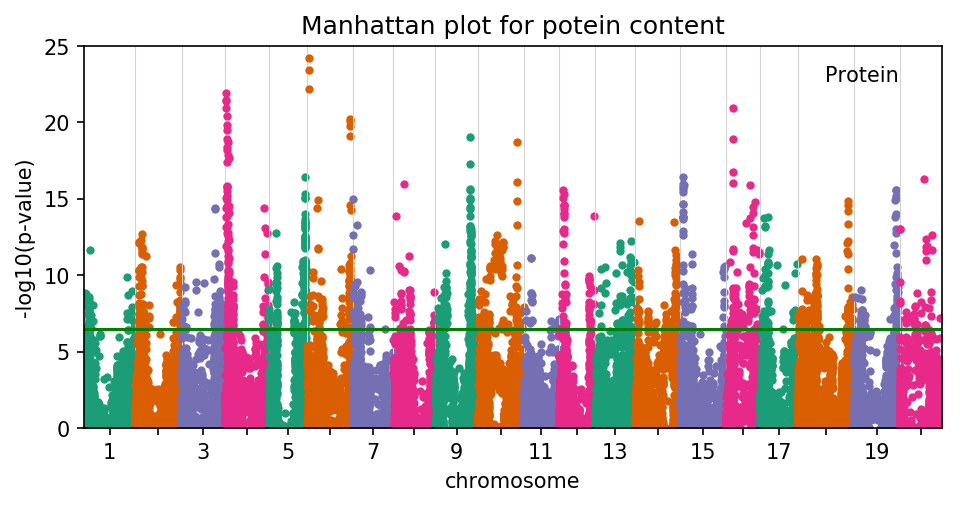

In [33]:
# hip_m['f0'].astype(str) is required in Python 3, since it reads unicode string by default

manhattan(     hip_p['f3'], hip_p['f1'], hip_p['f0'].astype(str), 'Protein',
               plot_type='single',
               chrs_plot=[str(i) for i in range(1,21)],
               chrs_names=chrs_names,
               cut = 0,
               title='Manhattan plot for potein content',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [6.5],
               colors = colors,
               scaling = '-log10')

/home/wang/anaconda3/lib/python3.7/site-packages/assocplots/qqplot.py:60: RuntimeWarning: invalid value encountered in less
  q_err[i, q_err[i, :] < 0] = 1e-15
/home/wang/anaconda3/lib/python3.7/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])


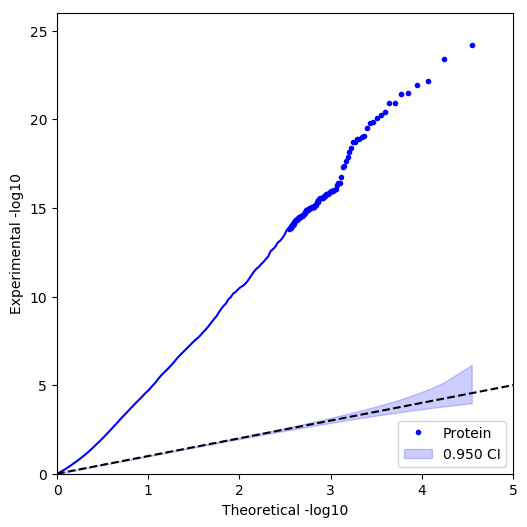

In [34]:
# This is an example of a classic QQ plot with 95% confidence interval plotted for the null distribution

mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_p['f3']], 
       ['Protein'], 
       color=['b'], 
       fill_dens=[0.2], 
       error_type='theoretical', 
       distribution='beta',
       title='')


plt.savefig('qq_HIPmen_theoretical_error.png', dpi=300)

## To find significant SNP associated with oil content

In [35]:
gwas = hl.linear_regression_rows(
    y=mt.pheno.oil,
    x=mt.GT.n_alt_alleles(),
    covariates=[1.0, mt.scores[0], mt.scores[1], mt.scores[2],mt.scores[3],mt.scores[4],mt.scores[5],mt.scores[6], mt.scores[7], mt.scores[8],mt.scores[9]])


2019-10-31 17:20:22 Hail: WARN: 2986 of 9765 samples have a missing phenotype or covariate.
2019-10-31 17:20:22 Hail: INFO: linear_regression_rows: running on 6779 samples for 1 response variable y,
    with input variable x, and 11 additional covariates...


In [36]:
gwas.p_value.export('pvalue_oo.txt')

2019-10-31 17:20:30 Hail: INFO: merging 41 files totalling 1.9M...
2019-10-31 17:20:30 Hail: INFO: while writing:
    pvalue_oo.txt
  merge time: 26.605ms


In [37]:
hip_o=np.genfromtxt('pvalue_o.txt', dtype=None)

In [38]:
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7.375, 3.375

/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure

0

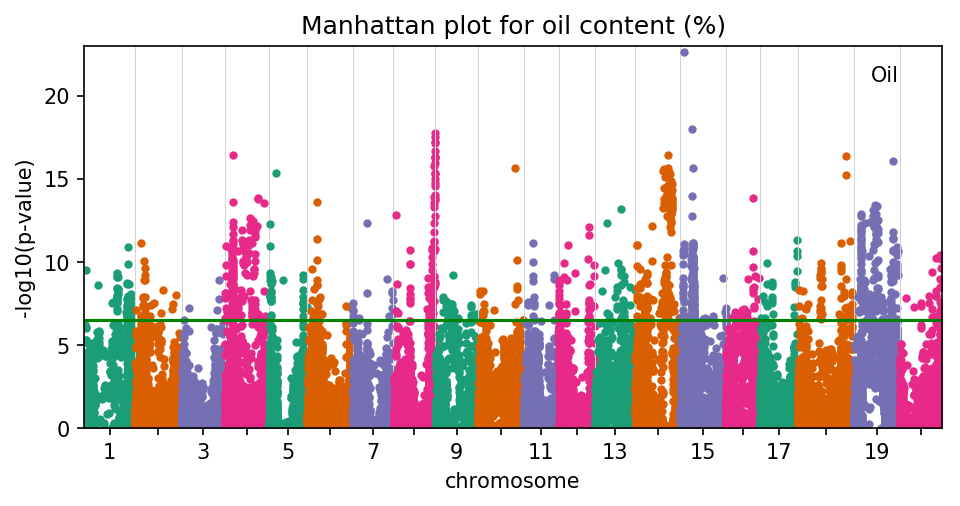

In [39]:
# hip_m['f0'].astype(str) is required in Python 3, since it reads unicode string by default

manhattan(     hip_o['f3'], hip_o['f1'], hip_o['f0'].astype(str), 'Oil',
               plot_type='single',
               chrs_plot=[str(i) for i in range(1,21)],
               chrs_names=chrs_names,
               cut = 0,
               title='Manhattan plot for oil content (%)',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [6.5],
               colors = colors,
               scaling = '-log10')

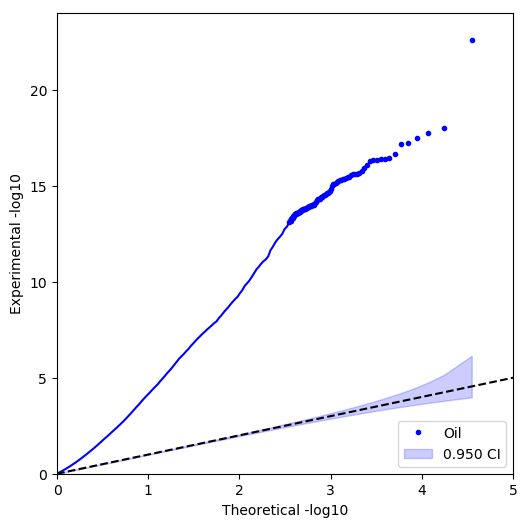

In [40]:
# This is a classic QQ plot with 95% confidence interval plotted for the null distribution for oil
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_o['f3']], 
       ['Oil'], 
       color=['b'], 
       fill_dens=[0.2], 
       error_type='theoretical', 
       distribution='beta',
       title='')


plt.savefig('qq_HIPmen_theoretical_error.png', dpi=300)

## To find significant SNP associated with Yield

In [41]:
gwas = hl.linear_regression_rows(
    y=mt.pheno.YLD,
    x=mt.GT.n_alt_alleles(),
    covariates=[1.0, mt.scores[0], mt.scores[1], mt.scores[2],mt.scores[3],mt.scores[4],mt.scores[5],mt.scores[6], mt.scores[7], mt.scores[8],mt.scores[9]])

2019-10-31 17:20:33 Hail: WARN: 2986 of 9765 samples have a missing phenotype or covariate.
2019-10-31 17:20:33 Hail: INFO: linear_regression_rows: running on 6779 samples for 1 response variable y,
    with input variable x, and 11 additional covariates...


In [42]:
p_yield= hl.plot.qq(gwas.p_value,title="Yield")
show(p_yield)

2019-10-31 17:20:40 Hail: INFO: Ordering unsorted dataset with network shuffle


In [43]:
gwas.p_value.export('pvalue_yy.txt')

2019-10-31 17:20:52 Hail: INFO: merging 41 files totalling 1.9M...
2019-10-31 17:20:52 Hail: INFO: while writing:
    pvalue_yy.txt
  merge time: 16.617ms


In [44]:
hip_y=np.genfromtxt('pvalue_y.txt', dtype=None)

In [45]:
### Set figure size
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7.375, 3.375

/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/wang/anaconda3/lib/python3.7/site-packages/matplotlib/figure

0

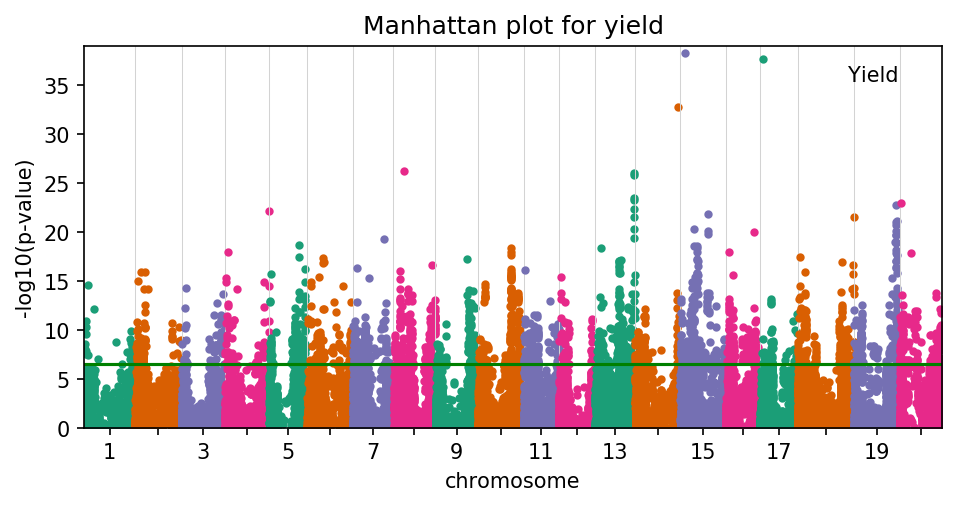

In [46]:
# hip_m['f0'].astype(str) is required in Python 3, since it reads unicode string by default

manhattan(     hip_y['f3'], hip_y['f1'], hip_y['f0'].astype(str), 'Yield',
               plot_type='single',
               chrs_plot=[str(i) for i in range(1,21)],
               chrs_names=chrs_names,
               cut = 0,
               title='Manhattan plot for yield',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               lines= [6.5],
               colors = colors,
               scaling = '-log10')

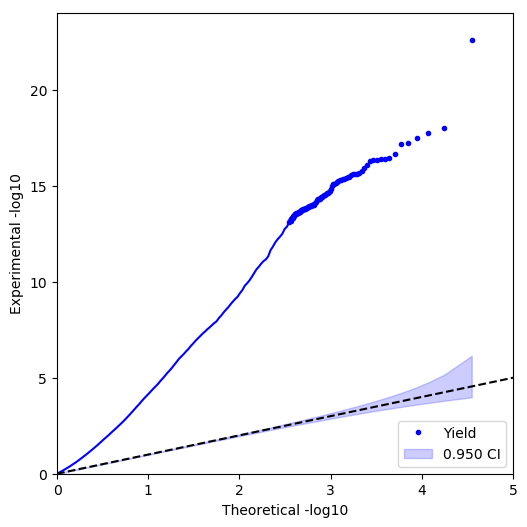

In [47]:
# This is a classic QQ plot with 95% confidence interval plotted for the null distribution for oil
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_o['f3']], 
       ['Yield'], 
       color=['b'], 
       fill_dens=[0.2], 
       error_type='theoretical', 
       distribution='beta',
       title='')


plt.savefig('Yield_5pc_glm.png', dpi=300)

 ###  As shown in the quantile-quantile (QQ) plots (for all three traits), the distribution of observed -log10 P-values from the simple model , which did not include population structure (top 5 PC), departed from the expected distribution under a model of no association with significant inflation of nominal P-values. While the MLM method, which includes population structure and Kinship, will allowe us to reduce the excess low P-values futher. The MLM analysis will be conducted in R because this is no python package available for MLM model.